In [1]:
import warnings
warnings.filterwarnings(action='ignore')

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


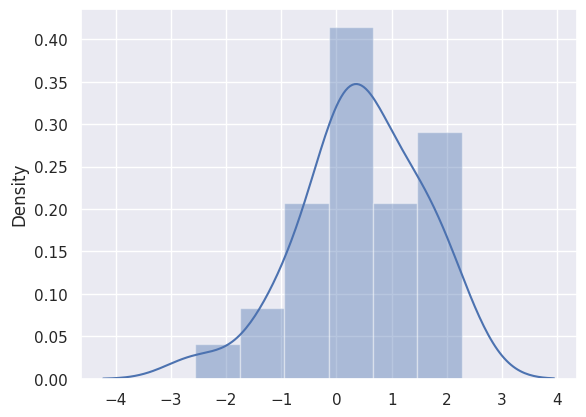

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

In [ ]:
# 히스토그램 : 불연속정
# bins(구간)를 무한정 잘랐을 때 나오는 곡선 -> 연속적인 밀도 확인

<Axes: ylabel='Density'>

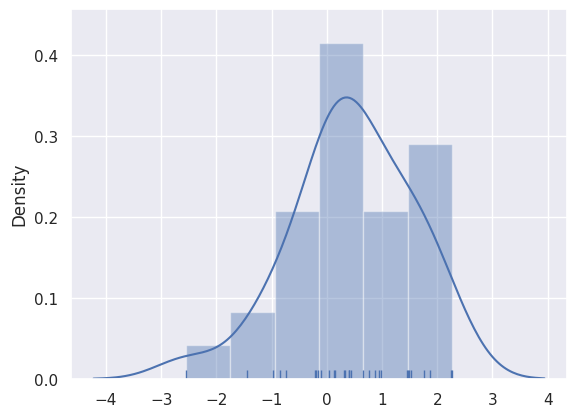

In [3]:
# 데이터 밀집 정도 확인
sns.distplot(x, rug=True) # 그래프 바닥에 밀집 정도 보임

In [4]:
# 개별 데이터 -> 가우시안 커널 함수 적용
# 각 데이터가 정규분포를 따르고 있다고 가정(점 하나하나가 데이터의 밀도가 가장 높은 곳에 있을 것이다 추정)

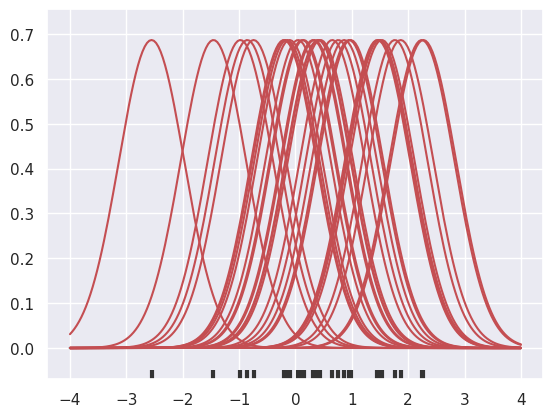

In [5]:
#최적의 가우시안 함수 구현해놓음
#각 데이터에 대한 PDF
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) #표준편차
support = np.linspace(-4, 4, 200)


kernels = []

#xi(data point)가 중심이되는 정규분포 만들어줌 -> N(xi, bandwidth)
for x_i in x: #데이터 포인트를 하나씩 뽑음
    kernel = stats.norm(x_i, bandwidth).pdf(support) #데이터 포인트 하나를 이 표준편차를 가지고 있는 정규분포로 만들어주고 정규분포의 확률밀도함수를 만들어줌
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

#kernels에 pdf 함수가 다 들어있음

In [8]:
len(kernels), len(kernels[0])

(30, 200)

In [7]:
# PDF들을 합쳐줘야함
 # 적분
from scipy.integrate import trapz #각 구간별 y에 대한 적분해줌

density = np.sum(kernels, axis=0) #커널:200개 데이터에 대한 밀도 #30개 데이터에 대한 커널을 0번 방향으로 합침
density.shape

(200,)

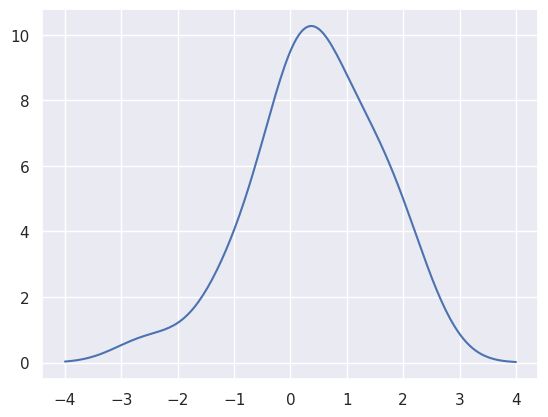

In [9]:
plt.plot(support, density) #support: 구간

In [10]:
# 각 구간별 적분값 구하기
# 정규화시키기 위해 -> 그래프 면적 1이 되기 위해 (면적:확률)
# 전체 구간 면적 합이 1이 될 수 있게

trapz(density, support)
# 정규화 해줄 값

29.99071526337815

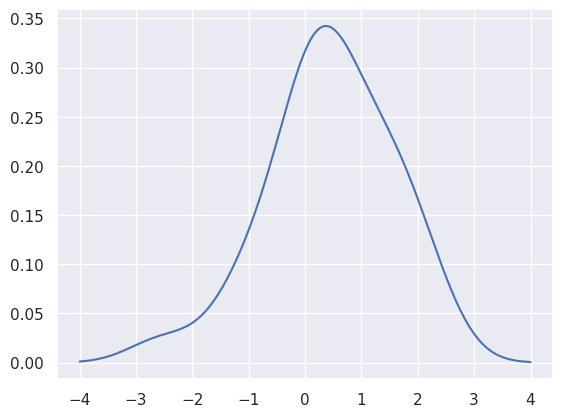

In [11]:
density /= trapz(density, support)
plt.plot(support, density)
#면적이 1인 PDF 그려줌

<Axes: ylabel='Density'>

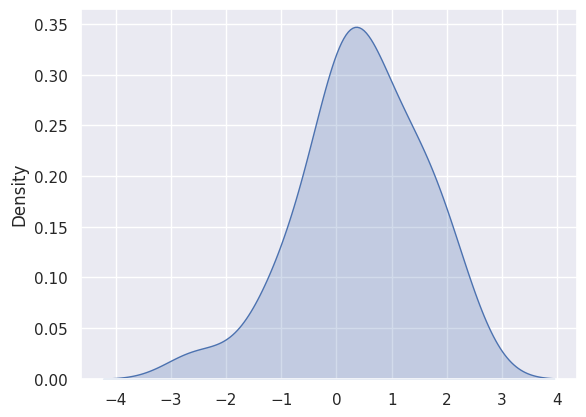

In [12]:
# seaborn 의 kdeplot()으로 kde 곡선을 바로 구할 수 있다.
sns.kdeplot(x, shade=True)

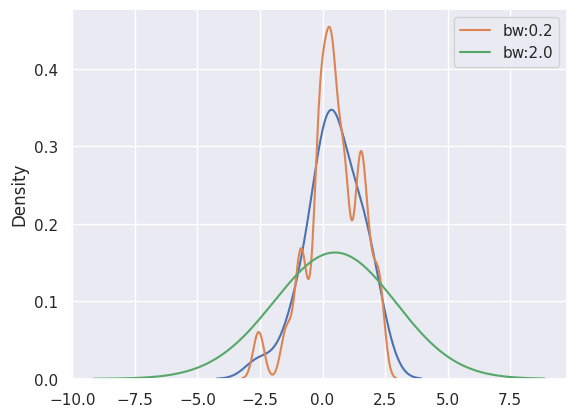

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label = 'bw:0.2')
sns.kdeplot(x, bw=2.0, label= 'bw:2.0')
plt.legend()
plt.show()

# 사이킷런 MeanShift 사용

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

In [15]:
meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)

print('클러스터의 유형:', np.unique(cluster_labels))
#데이터는 3덩어리 -> meanshift 한 후 8개의 덩어리 

클러스터의 유형: [0 1 2 3 4 5 6 7]


In [16]:
import pandas as pd

sample_data_df = pd.DataFrame(data=X, columns = ['x1','x2'])

sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


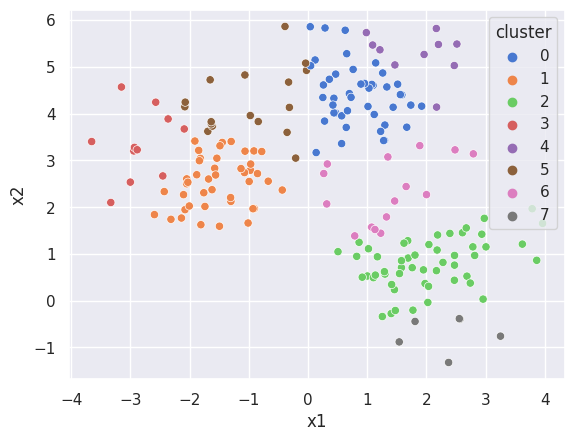

In [17]:
sns.scatterplot(x = 'x1', y = 'x2', hue='cluster', palette='muted', data = sample_data_df)
plt.show()


클러스터의 유형: [0 1 2]


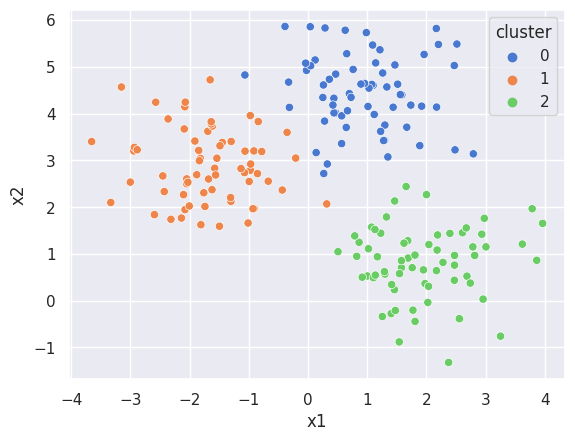

In [19]:
# bandwidth 증가
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)

print('클러스터의 유형:', np.unique(cluster_labels))

sample_data_df = pd.DataFrame(data=X, columns = ['x1','x2'])

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(x = 'x1', y = 'x2', hue='cluster', palette='muted', data = sample_data_df)
plt.show()

In [20]:
# 최적의 bandwidth 찾기 - estimate_bandwidth()
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25) #거의 0.25사용
best_bandwidth

1.6889636737559222

클러스터의 유형: [0 1 2]


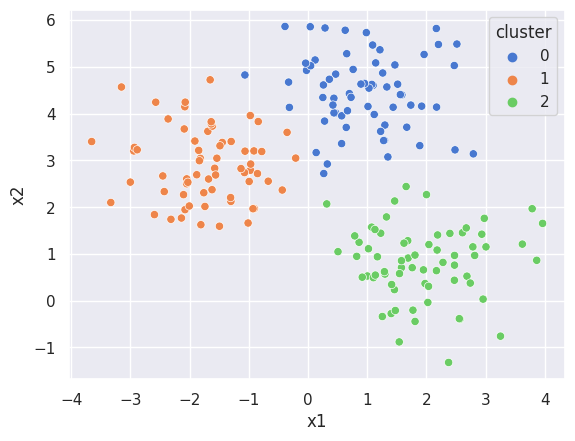

In [21]:
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

print('클러스터의 유형:', np.unique(cluster_labels))

sample_data_df = pd.DataFrame(data=X, columns = ['x1','x2'])

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(x = 'x1', y = 'x2', hue='cluster', palette='muted', data = sample_data_df)
plt.show()

In [22]:
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

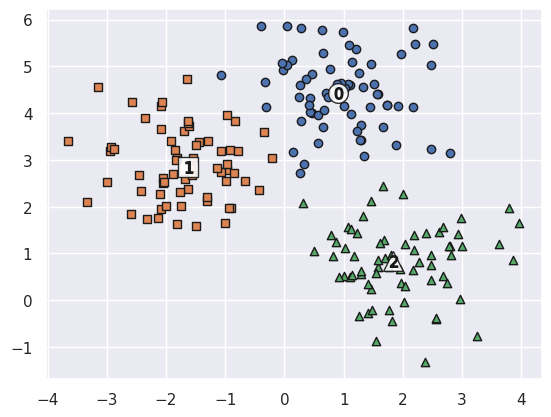

In [23]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()